In [8]:
import tensorflow as tf
from tensorflow.keras import layers
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as sklearn
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import os

In [58]:
# 读取数据
testdata = pd.read_csv('../data/dataannalysis/happiness_test_abbr.csv')
traindata = pd.read_csv('../data/dataannalysis/happiness_train_abbr.csv')

In [59]:
#异常数据处理
traindata = traindata[traindata['happiness'] != -8]
traindata = traindata[traindata['depression'] != -8]
traindata = traindata[traindata['class'] != -8]
traindata = traindata[traindata['health'] != -8]
traindata = traindata[traindata['equity'] != -8]
traindata = traindata[traindata['family_status'] != -8]
traindata = traindata[traindata['health_problem'] != -8]
traindata = traindata[traindata['relax'] != -8]
traindata = traindata[traindata['learn'] != -8]
traindata['view'].replace(-8,3,inplace = True)
traindata = traindata[traindata['socialize'] != -8]
traindata = traindata[traindata['socialize'] != -1]
traindata = traindata[traindata['socialize'] != -2]
traindata = traindata[traindata['socialize'] != -3]
traindata = traindata[traindata['socialize'] != 50]
traindata = traindata[traindata['status_3_before'] != -8]
traindata = traindata[traindata['status_peer'] != -8]
traindata['inc_ability'].replace(-8,3,inplace = True)


#数据重新处理
traindata['marital'].replace(2,1,inplace = True)
traindata['marital'].replace(3,1,inplace = True)
traindata['marital'].replace(4,1,inplace = True)
traindata['marital'].replace(7,1,inplace = True)
traindata['marital'].replace(6,2,inplace = True)
traindata['marital'].replace(5,3,inplace = True)

bins = [-100,0,100000,300000,500000,1000000,10000000] 
traindata['income'] = pd.cut(traindata['income'],bins, labels=['1','2', '3', '4', '5', '6'])



avg_income=traindata['family_income']/traindata['family_m']
traindata['avg_income'] = avg_income
bins = [-100,0,20000,50000,100000,1000000,10000000] 
traindata['avg_income'] = pd.cut(traindata['avg_income'],bins, labels=['1','2', '3', '4', '5', '6'])

testdata['view'].replace(-8,3,inplace = True)
testdata['inc_ability'].replace(-8,3,inplace = True)

testdata['marital'].replace(2,1,inplace = True)
testdata['marital'].replace(3,1,inplace = True)
testdata['marital'].replace(4,1,inplace = True)
testdata['marital'].replace(7,1,inplace = True)
testdata['marital'].replace(6,2,inplace = True)
testdata['marital'].replace(5,3,inplace = True)

testdata['income'] = pd.cut(testdata['income'],bins, labels=['1','2', '3', '4', '5', '6'])


avg_income=testdata['family_income']/testdata['family_m']
testdata['avg_income'] = avg_income
testdata['avg_income'] = pd.cut(testdata['avg_income'],bins, labels=['1','2', '3', '4', '5', '6'])


In [60]:
#traindata['avg_income'].('unknown', inplace=True)
traindata['avg_income'] = traindata['avg_income'].cat.add_categories(['0']);
traindata['avg_income'].fillna('0', inplace=True)

le = sklearn.preprocessing.LabelEncoder() 
le.fit(['1','2', '3', '4', '5', '6', '0']) 
traindata['avg_income']  = le.transform(traindata['avg_income'] ) 

le = sklearn.preprocessing.LabelEncoder() 
le.fit(['1','2', '3', '4', '5', '6']) 
traindata['income']  = le.transform(traindata['income'] ) 

#traindata['avg_income'].('unknown', inplace=True)
testdata['avg_income'] = testdata['avg_income'].cat.add_categories(['0']);
testdata['avg_income'].fillna('0', inplace=True)


testdata['avg_income']  = le.transform(testdata['avg_income'] ) 

testdata['income']  = le.transform(testdata['income'] ) 

ValueError: y contains new labels: ['0']

In [63]:
traindatafinal = traindata[['happiness','depression','class','health','equity','family_status','health_problem','relax','learn','view','socialize','status_peer','status_3_before','inc_ability','car','avg_income','edu']]

testdatafinal = testdata[['depression','class','health','equity','family_status','health_problem','relax','learn','view','socialize','status_peer','status_3_before','inc_ability','car','avg_income','edu']]


In [13]:
train, test = train_test_split(traindatafinal, test_size=0.2)
train, val = train_test_split(train, test_size=0.2)
print(len(train), 'train examples')
print(len(val), 'validation examples')
print(len(test), 'test examples')

4939 train examples
1235 validation examples
1544 test examples


In [44]:
train_x = train.copy()
labels = train_x.pop('happiness')
train_y = tf.one_hot(labels-1,5)

test_x = test.copy()
testlabels = test_x.pop('happiness')
test_y = tf.one_hot(testlabels-1,5)

val_x = train.copy()
vallabels = val_x.pop('happiness')
val_y = tf.one_hot(vallabels-1,5)

train_x.head()

,depression,class,health,equity,family_status,health_problem,relax,learn,view,socialize,status_peer,status_3_before,inc_ability,car,avg_income,edu
1214,3,1,3,4,2,4,4,4,4,2,3,2,2,2,2,10
422,2,3,3,4,3,4,2,1,3,1,3,2,3,2,1,4
4883,4,4,4,3,1,4,1,1,3,2,3,2,2,2,2,1
2932,4,4,3,4,2,4,4,1,3,4,3,2,3,2,2,4
7584,3,5,2,4,3,2,4,1,4,1,2,2,2,2,2,1


In [35]:
labels.head()

1214    4
422     1
4883    3
2932    4
7584    4
Name: happiness, dtype: int64

In [37]:

train_y = tf.one_hot(labels-1,5)
train_y

<tf.Tensor: id=384, shape=(4939, 5), dtype=float32, numpy=
array([[0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       ...,
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.]], dtype=float32)>

In [70]:
model = tf.keras.Sequential([
#   layers.Flatten(input_shape=(NONE, 28)),
  layers.Dense(10,kernel_regularizer= tf.keras.regularizers.l2(0.001), activation='relu', input_shape=[16]),
  layers.Dense(7, kernel_regularizer=tf.keras.regularizers.l2(0.001),activation='relu'),
  layers.Dense(5, activation='sigmoid')
])
optimizer = tf.keras.optimizers.RMSprop(0.001)

model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['accuracy','mae', 'mse'])

model.summary()


Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 10)                170       
_________________________________________________________________
dense_15 (Dense)             (None, 7)                 77        
_________________________________________________________________
dense_16 (Dense)             (None, 5)                 40        
Total params: 287
Trainable params: 287
Non-trainable params: 0
_________________________________________________________________


In [71]:
history = model.fit(train_x,
                    train_y,
                    epochs=40,
                    batch_size=512,
                    validation_data=(val_x, val_y),
                    verbose=1)

Train on 4939 samples, validate on 4939 samples
Epoch 1/40
4939/4939 [==============================] - 0s 65us/sample - loss: 0.4632 - accuracy: 0.0626 - mae: 0.5894 - mse: 0.4425 - val_loss: 0.4249 - val_accuracy: 0.0624 - val_mae: 0.5649 - val_mse: 0.4047
Epoch 2/40
4939/4939 [==============================] - 0s 6us/sample - loss: 0.4038 - accuracy: 0.0624 - mae: 0.5487 - mse: 0.3838 - val_loss: 0.3786 - val_accuracy: 0.0624 - val_mae: 0.5274 - val_mse: 0.3589
Epoch 3/40
4939/4939 [==============================] - 0s 6us/sample - loss: 0.3630 - accuracy: 0.0628 - mae: 0.5122 - mse: 0.3435 - val_loss: 0.3450 - val_accuracy: 0.0628 - val_mae: 0.4936 - val_mse: 0.3258
Epoch 4/40
4939/4939 [==============================] - 0s 5us/sample - loss: 0.3344 - accuracy: 0.0630 - mae: 0.4816 - mse: 0.3153 - val_loss: 0.3218 - val_accuracy: 0.0664 - val_mae: 0.4673 - val_mse: 0.3031
Epoch 5/40
4939/4939 [==============================] - 0s 6us/sample - loss: 0.3133 - accuracy: 0.0739 - mae: 

Epoch 40/40
4939/4939 [==============================] - 0s 6us/sample - loss: 0.1187 - accuracy: 0.6044 - mae: 0.2288 - mse: 0.1129 - val_loss: 0.1185 - val_accuracy: 0.6044 - val_mae: 0.2274 - val_mse: 0.1127


In [72]:
results = model.evaluate(test_x, test_y)

print(results)

1544/1544 [==============================] - 0s 19us/sample - loss: 0.1158 - accuracy: 0.6192 - mae: 0.2245 - mse: 0.1101
[0.11584633480699569, 0.61917096, 0.22452824, 0.11007025]


In [48]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'mae', 'mse', 'val_loss', 'val_mae', 'val_mse'])

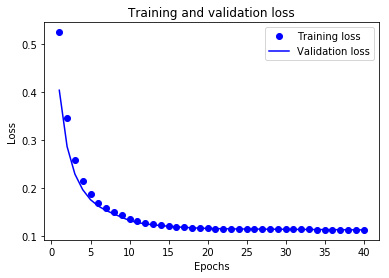

In [50]:
import matplotlib.pyplot as plt

acc = history_dict['mae']
val_acc = history_dict['val_mae']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [64]:
predictions= model.predict(testdatafinal)


In [66]:
predictions

array([[0.01722544, 0.08192572, 0.16030249, 0.60254866, 0.2208769 ],
       [0.01185894, 0.13214874, 0.0903784 , 0.5036901 , 0.11763519],
       [0.03937125, 0.3213198 , 0.1091035 , 0.3981722 , 0.11493742],
       ...,
       [0.01726073, 0.06923667, 0.17752752, 0.62862074, 0.2493692 ],
       [0.01052359, 0.07797799, 0.11790338, 0.5852132 , 0.16776866],
       [0.00428686, 0.0218471 , 0.13751245, 0.72282267, 0.23971036]],
      dtype=float32)